In [1]:
import torch
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# from torch._C import device
# from torch.utils.data import Dataset, DataLoader, dataloader
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
# import torch.nn.functional as F
from PIL import Image

In [2]:
# from main import main
from BW_dataset import BWDataset
from net import CONVNet
from net import FULLNet
from train_val import train
# from train_val import val
from preview import imshow
from preview import preview
from preview import imshow_to_numpy
torch.backends.cudnn.benchmark = True


In [3]:
#main
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 50


trainset = BWDataset(train=True, download=True,device=device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)

valset = BWDataset(train=False, download=True,device=device)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=0)



Files already downloaded and verified
Files already downloaded and verified


In [4]:
torch.cuda.is_available()

True

In [5]:
NET = CONVNet().to(device)


criterion = nn.L1Loss(reduction="mean").to(device)
optimizer = optim.Adam(NET.parameters(), lr=0.0001)

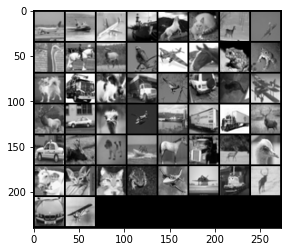

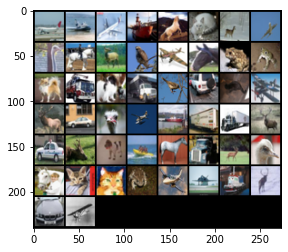

In [6]:
preview(trainloader)

In [7]:
train_set_loss, val_set_loss, number_of_epochs = train(100,trainloader,valloader,optimizer,criterion, NET)


validation set: Average loss: 0.0523

validation set: Average loss: 0.0527

validation set: Average loss: 0.0495

validation set: Average loss: 0.0503

validation set: Average loss: 0.0480

validation set: Average loss: 0.0481

validation set: Average loss: 0.0481

validation set: Average loss: 0.0482

validation set: Average loss: 0.0469

validation set: Average loss: 0.0482

validation set: Average loss: 0.0464

validation set: Average loss: 0.0465

validation set: Average loss: 0.0461

validation set: Average loss: 0.0462

validation set: Average loss: 0.0459

validation set: Average loss: 0.0461

validation set: Average loss: 0.0461

validation set: Average loss: 0.0459

validation set: Average loss: 0.0455

validation set: Average loss: 0.0455

validation set: Average loss: 0.0454

validation set: Average loss: 0.0454

validation set: Average loss: 0.0457

validation set: Average loss: 0.0453

validation set: Average loss: 0.0454

validation set: Average loss: 0.0460

validation 

In [8]:
PATH = './data/conv_20epoch.ckpt'

In [9]:
torch.save(NET.state_dict(), PATH) #full model, 20 epochs, batch =2

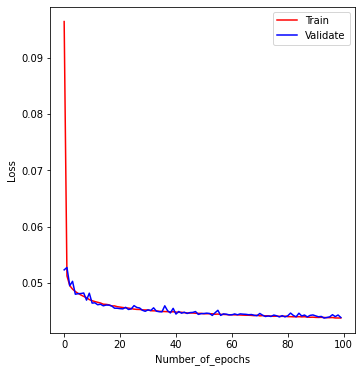

In [10]:

plt.figure( figsize=(12,6))

plt.subplot(121)
plt.plot(number_of_epochs,train_set_loss,'r',label = 'Train')
plt.plot(number_of_epochs,val_set_loss,'b',label = 'Validate')
plt.xlabel('Number_of_epochs'); plt.ylabel('Loss');
plt.legend()

plt.show()

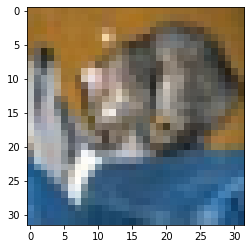

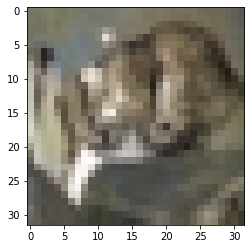

0.044575285166502 0.00022287642583250999 200


In [11]:
from preview import imshow
val_loss = 0
with torch.no_grad():
    for idx, data in enumerate(valloader):
        gray, color = data
        # calculate outputs by running images through the network
        outputs = NET(gray)
        loss = criterion(outputs, color)
        val_loss += loss.item()


        imshow_to_numpy(color[0])
        plt.figure()
        imshow_to_numpy(outputs[0])
        # print(torch.sum(torch.abs(outputs[0] - color[0]))/ (3*32*32), criterion(outputs, color))
        break
    print(val_loss, val_loss/ len(valloader), len(valloader))

In [12]:

NET.load_state_dict(torch.load(PATH))
NET.eval()

CONVNet(
  (conv1): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(30, 60, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(60, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(150, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(70, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(15, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [13]:
from preview import imshow
val_loss = 0
with torch.no_grad():
    for idx, data in enumerate(valloader):
        gray, color = data
        print(color)
        # calculate outputs by running images through the network
        outputs = NET(gray)
        loss = criterion(outputs, color)
        val_loss += loss.item()
        # print(outputs[0] / torch.max(outputs[0]))

        # imshow(gray[0])
        # plt.figure()
        # imshow(outputs[0])
        # print(torch.sum(torch.abs(outputs[0] - color[0]))/ (3*32*32), criterion(outputs, color))
        # break
    print(val_loss, val_loss/ len(valloader), len(valloader))

tensor([[[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
          [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
          [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
          ...,
          [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
          [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
          [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],

         [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
          [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
          [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
          ...,
          [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
          [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
          [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],

         [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
          [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
          [0.1843, 0.1294, 0.1412,  ..., 0

In [14]:
val_loss = 0
with torch.no_grad():
    for idx, data in enumerate(trainloader):
        gray, color = data
        # calculate outputs by running images through the network
        outputs = NET(gray)
        loss = criterion(outputs, color)
        val_loss += loss.item()
        # print(val_loss)
        # imshow(gray[3])
        # plt.figure()
        # imshow(outputs[3])
        # break
    val_loss /= len(trainloader)
    print(idx,". ", val_loss, (val_loss/ len(trainloader)), len(trainloader))
print("\nvalidation set: Average loss: {:.4f}".format(val_loss))
# return val_loss


999 .  0.043588800732046365 4.3588800732046366e-05 1000

validation set: Average loss: 0.0436


In [15]:
# from PIL import Image

# with torch.no_grad():
#     pic = r"C:\Users\mikay\Documents\Study\black_white_project\text.jpg"
#     with Image.open(pic) as im:
#         # im.show()


#         # img_transform = transforms.Compose([transforms.PILToTensor()])
#         # pic = img_transform(pic)



#         pic_transform = transforms.ToTensor()
#         pic = pic_transform(im)
#         gray_transform = torchvision.transforms.Grayscale(num_output_channels=1)
#         gray_test = gray_transform(pic)

#         gray_test = torch.unsqueeze(gray_test,0).to(device)
#         outputs = NET(gray_test)

#         # # imshow(color[0])
#         # # plt.figure()
#         imshow(outputs[0])

In [26]:

def test_paint(pic_path):
    with torch.no_grad():
        with Image.open(pic_path) as im:
            pic_transform = transforms.ToTensor()
            pic = pic_transform(im)

            gray_test = pic
            if pic.shape[0]>1:
                gray_transform = torchvision.transforms.Grayscale(num_output_channels=1)
                gray_test = gray_transform(pic)
            gray_test = torch.unsqueeze(gray_test,0).to(device)

            outputs = NET(gray_test)
            imshow(im)
            imshow_to_numpy(outputs[0])


            # fig, (ax1, ax2) = plt.subplots(1, 2)
            # fig.suptitle('Horizontally stacked subplots')
            # ax1.plot(im, outputs[0])
            # ax2.plot(im, -outputs[0])

            

            del outputs
            del gray_test
            torch.cuda.empty_cache()
    

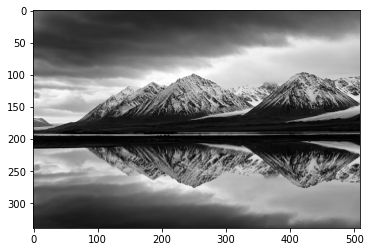

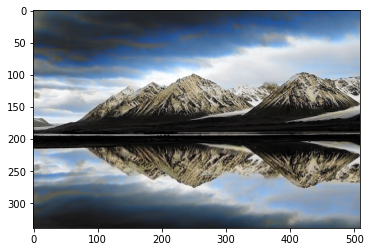

ValueError: x and y must have same first dimension, but have shapes (339, 509, 3) and torch.Size([3, 339, 509])

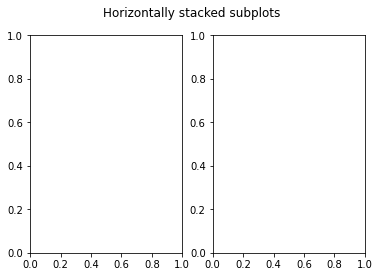

In [27]:
pic_path = r"C:\Users\mikay\Documents\Study\black_white_project\test.jpg"
test_paint(pic_path)

In [18]:


# with torch.no_grad():
#     pic = r"C:\Users\mikay\Documents\Study\black_white_project\test1.jpg"
#     with Image.open(pic) as im:
#         # im.show()


#         # img_transform = transforms.Compose([transforms.PILToTensor()])
#         # pic = img_transform(pic)



#         pic_transform = transforms.ToTensor()
#         pic = pic_transform(im)
#         print(pic.shape)
#         gray_test = pic
#         if pic.shape[0]>1:
#             gray_transform = torchvision.transforms.Grayscale(num_output_channels=1)
#             gray_test = gray_transform(pic)
        

#         gray_test = torch.unsqueeze(gray_test,0).to(device)
#         outputs = NET(gray_test)

#         # # imshow(color[0])
#         # # plt.figure()
#         imshow(outputs[0])
#         del outputs
#         del gray_test
#         torch.cuda.empty_cache()

